In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

random_state = 50
n_samples = 10000
centers = 4
n_features=2

## 1. Compare between random initialization and kmeans++ initialization:

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = n_samples, centers = centers, n_features=n_features, cluster_std=[1.0, 2, 1.5, 0.5], shuffle=True, random_state=random_state)

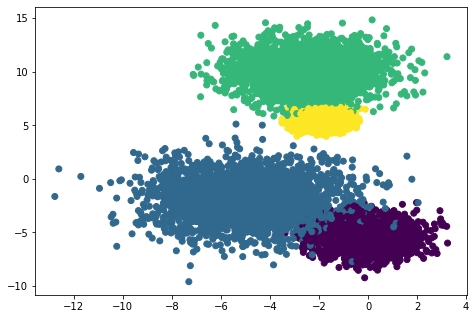

In [3]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [4]:
from sklearn.cluster import KMeans

random_init_kmean = KMeans(n_clusters= centers, init="random", n_init=1, random_state=random_state)

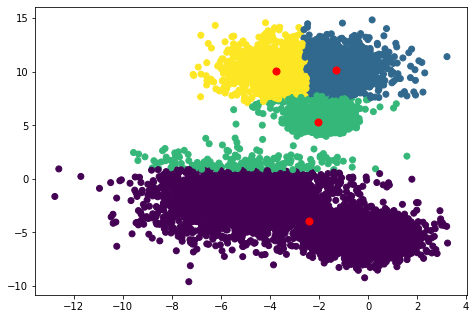

In [5]:
random_init_kmean.fit(x)
centroids = random_init_kmean.cluster_centers_
pred_clusters = random_init_kmean.predict(x)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x[:, 0], x[:, 1], c=pred_clusters)
for i, j in centroids:
    ax.scatter(i, j, s=50, c='red')
plt.show()

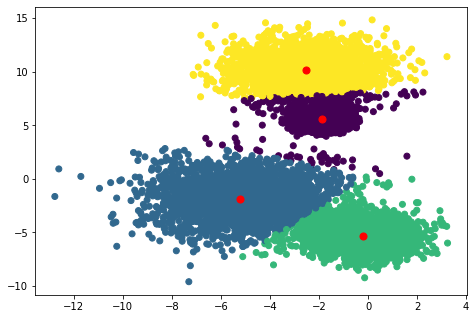

In [6]:
kmean_plus = KMeans(n_clusters= centers, init="k-means++", n_init=1, random_state=random_state)
kmean_plus.fit(x)
centroids = kmean_plus.cluster_centers_
pred_clusters = kmean_plus.predict(x)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x[:, 0], x[:, 1], c=pred_clusters)
for i, j in centroids:
    ax.scatter(i, j, s=50, c='red')
plt.show()

# Elbow method

In [19]:
def calculate_Elbow(x, kmax):
    WSS_list = []
    k_list = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(x)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(x)
        
        WSS = 0
        for i in range(len(x)):
            center = centroids[pred_clusters[i]]
            WSS += np.linalg.norm(x[i] - center)
        WSS_list.append(WSS)
        k_list.append(k)
    plt.plot(k_list, WSS_list, marker='o', color='r')
    plt.xlabel('k')
    plt.ylabel('WSS')
    plt.xticks(np.arange(1, kmax + 1))
    plt.show()

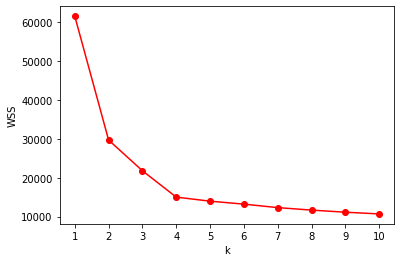

In [20]:
calculate_Elbow(x, 10)

#### Từ đồ thị biểu diễn giữa WSS và số lượng cluster k. Chúng ta có thể lựa chọn phần elbow cho đồ thị này là vị trí k = 4.

#### Tuy nhiên việc chúng ta lựa chọn phần elbow như k = 5, 6 đôi khi cũng có thể hợp lí cho bài toán chúng ta đang làm

# Silhouette Method

In [27]:
from sklearn.metrics import silhouette_score

def calculate_Silhouette(x, kmax):
    Silhouette_list = []
    k_list = []
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(x)
        labels = kmeans.labels_
        
        score = silhouette_score(x, labels, metric = 'euclidean')
        Silhouette_list.append(score)
        k_list.append(k)
        
    plt.plot(k_list, Silhouette_list, marker='o', color='r')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.xticks(np.arange(2, kmax + 1))
    plt.show()

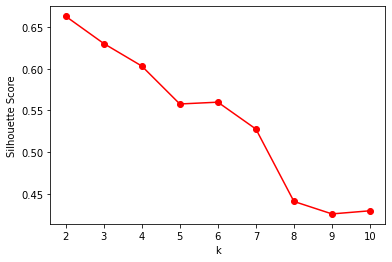

In [28]:
calculate_Silhouette(x, 10)

#### Nếu chúng ta có nhiều sự lựa chọn ở phần elbow ở trên, Silhouette Method cho ta thêm 1 giá trị để tham khảo, cũng như đánh giá độ tốt của cách chia cho từng trường hợp.

#### Ở đây chúng ta đang cân nhắc giữa k = 4,5,6. Nếu nhìn vào đồ thị biểu diễn giữa Silhouette Score và k, chúng ta thấy k = 4 có điểm đánh giá cao nhất, nên chúng ta có thể tự tin chọn k = 4 làm số lượng Cluster phải chia cho bài toán của mình.